<a href="https://colab.research.google.com/github/AnnaKraim/ML/blob/main/kr_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ПРИШЛО ВРЕМЯ ПИСАТЬ КОНТРОЛЬНУЮ
КОНТРОЛЬНАЯ САМА СЕБЯ НЕ НАПИШЕТ

KNN найди N соседей!

**Задание 1**

Вам дан датасет wine.csv, обучите модель с помощью KNN и кросс-валидации, найдите лучшее кол-во соседей.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df=pd.read_csv("wine.csv")
y=df["Wine"].astype(int)
X=df.drop(columns=["Wine"])
acc_scores = []
m=0
l=0
for k in range(1, 130):
  knn = KNeighborsClassifier(n_neighbors=k)
  acc_scores.append(cross_val_score(knn, X, y, cv = KFold(n_splits=4, shuffle=True)).mean())
  if acc_scores[k-1]>m:
    m=acc_scores[k-1]
    l=k
print(l,m)

1 0.7325581395348837


**Задание 1***

Постройте график зависимости accuracy от числа соседей.

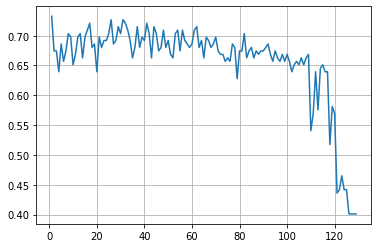

In [ ]:
plt.plot(range(1, 130), acc_scores)
plt.grid()
plt.show()

**Задание 2**

Проверьте, нужно ли учитывать расстояние до ближайших соседей.
Найдите лучшую комбинацию кол-во соседей / функция расстояния

In [ ]:
acc_scores1 = []
m=0
l=0
for k in range(1, 130):
  knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
  acc_scores1.append(cross_val_score(knn, X, y, cv = KFold(n_splits=4, shuffle=True)).mean())
  if acc_scores1[k-1]>m:
    m=acc_scores1[k-1]
    l=k
print(l,m)

3 0.7616279069767442


**Задание 2***

Добавьте к графику из задания 1*, такой же график, но учитывающий расстояние.

На вашем графике должна быть 1 прямая

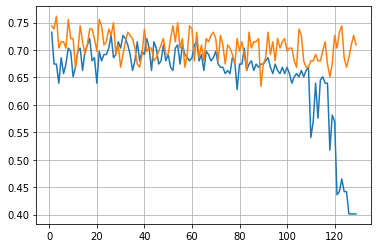

In [ ]:
plt.plot(range(1, 130), acc_scores)
plt.plot(range(1, 130), acc_scores1)
plt.grid()
plt.show()

**Задание 3**

Отмасштабируйте данные с помощью sklearn

Сравните с полученными результатами, найдите лучшие параметры

In [ ]:
from sklearn.preprocessing import scale
# X_scaled = scale(X)

In [ ]:
Xsc = scale(X)
Xsc=pd.DataFrame(Xsc,columns=X.columns)
acc_scores2 = []
m=0
l=0
for k in range(1, 130):
  knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
  acc_scores2.append(cross_val_score(knn, Xsc, y, cv = KFold(n_splits=4, shuffle=True)).mean())
  if acc_scores2[k-1]>m:
    m=acc_scores2[k-1]
    l=k
print(l,m)

25 0.9825581395348837


**Задание 3***

Добавьте к графику из задания 2*, такой же график, но учитывающий scale данных.

На вашем графике должно быть 3 прямых

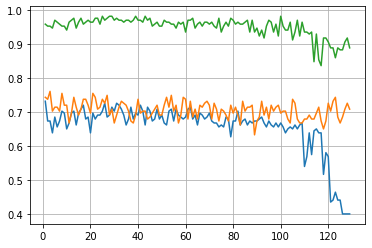

In [ ]:
plt.plot(range(1, 130), acc_scores)
plt.plot(range(1, 130), acc_scores1)
plt.plot(range(1, 130), acc_scores2)
plt.grid()
plt.show()